# Logistic regression for binary classification problems from scratch

### in this notebook, I create a simple logistic regression classifier from scratch, just to show the mathematics behind this Supervised learning algorithm. Of course you can improve this code, by adding OOP, defining methods, avoiding hardcoded values in order to adapt this to a wider range of situations (e.g. no matter the dimensions of the data) etc... But the main purpose of this notebook is to show the process of creating a basic logistic regression model 

In [195]:
# importing the required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# First, I load the data from sklearn and do some checking stuff, like the name of the keys, the shape of the data...

In [217]:
data = load_iris()

In [197]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [198]:
data['data'].shape

(150, 4)

## This step is very important. I make use of Pandas to create a dataframe only with the desired keys, like the raw data, the target of every row and the features names

In [221]:
petal_df = pd.DataFrame(np.c_[data['data'], data['target']], columns=np.append(data['feature_names'], 'target'))

### in this problem we try to identity which type of flower we have depending on features like the sepal length, sepal width, petal length and petal width. So this data only have 4 features and 1 output, which represents the class the flower belongs

In [220]:
petal_df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


## in the next step I do some slicing to get rid of the last 50 rows. Originally, This is a multiclass problem (with 3 different classes) and in order to convert this into a binary classification problem I got rid of one of the classes (class 2, from 101-150) - so now I have only two possible classes and a binary problem

In [200]:
petal_df = petal_df[0:100]

### After that I define X and y, in this case X corresponds to all the independent variables while y is the dependent variable (target)

In [201]:
X = petal_df.iloc[:, :-1].values
y = petal_df.iloc[:, -1].values

### then I divide the dataset into training and test sets with the help of sklearn

In [202]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

### One important step before going any further is to declare all the features individually so we can make use of them in the following equation

In [203]:
x1 = X_train[:,0]
x2 = X_train[:,1]
x3 = X_train[:,2]
x4 = X_train[:,3]

In [204]:
x1 = x1.reshape(90,1)
x2 = x2.reshape(90,1)
x3 = x3.reshape(90,1)
x4 = x4.reshape(90,1)

In [205]:
y_train = y_train.reshape(90,1)

### When performing logistic regression, is a required step to define a sigmoid function in order to squeeze all the values beetwen 0 and 1. If we wouldn't do this, then we might get values above 1 and below 0

In [206]:
def sigmoid(x):
    return (1 / (1 + np.exp(-x)))

### bellow here we have some terms like m, which is the length of the train dataset, the learning rate, a required parameter to reduce our cost function by sustracting tiny steps to the cost function and partial derivatives, and finally all the theta parameters depending on the dimension of our data (in this case we have 4 dimensions corresponding to 4 features), each of them initialized with 0

In [207]:
m = len(X_train)

learning_rate = 0.01

theta0 = np.zeros((m,1))
theta1 = np.zeros((m,1))
theta2 = np.zeros((m,1))
theta3 = np.zeros((m,1))
theta4 = np.zeros((m,1))



## Bellow this text, I have appied Batch gradient descent (GD with all the data available): first I declare the number of iterations (epochs) this loop is going to take (10000) in order to reduce our cost function. I am going to explain all the steps that this proccess takes to converge in 

### - 1st step: I define the linear equation for this problem, which is: theta0 + theta(i) * feature(i)... you can find this equation in the internet easily

### - 2nd step: we pass that value though a sigmoid function to get an output between 0 and 1 and work with consistent and probability values

### - 3rd Step: We define our cost function by applying the cost function for logistic regression. This optimized equation was obtained from professor Andrew NG, Stanford University, and test the hypothesis (our prediction) with the true label (y_train), the dot product between matrices.

### - 4th Step: keep in mind in the first iterations, this cost function will be huge, so we need to tweak some parameters to reduce this cost error. And because we can't change our data, the only possible way to reduce the error is by adjusting the theta arguments. For that, we need to take the partial derivatives of the cost function with respect to each theta parameter we have (if we have 4 dimensions then 4 theta + theta0), so we can obtain a smaller error by derivating the error. This equation can also be found in the internet very easily

### - 5th Step: in the next step, as Andrew NG suggests, we need to update the theta parameters by substracting them a tiny number, in this case, the learning rate * each individual gradient, so in each iteration we'll have an updated value for these theta parameters in the right direction

In [216]:
# in Object Oriented programming, this could be a method called fit, similar to what sklearn does

epochs = 0
cost_outputs = []

while(epochs < 6000):
    
    #linear equation formula
    linear_equation = theta0 + theta1 * x1 + theta2 * x2 + theta3 * x3 + theta4 * x4
    
    #sigmoid function
    predictions = sigmoid(linear_equation)
    
    # I compute the cost function value just to plot it and see if this is decreasing.
    cost_function = (- np.dot(np.transpose(y_train),np.log(predictions)) - np.dot(np.transpose(1-y_train),np.log(1-predictions)))/m
    
    
    theta_0_partial_der = np.dot(np.ones((1,m)),predictions-y_train)/m
    theta_1_partial_der = np.dot(np.transpose(x1),predictions-y_train)/m
    theta_2_partial_der = np.dot(np.transpose(x2),predictions-y_train)/m
    theta_3_partial_der = np.dot(np.transpose(x3),predictions-y_train)/m
    theta_4_partial_der = np.dot(np.transpose(x4),predictions-y_train)/m
    
    # bellow here we update each theta value before ending the iteration so we can start
    # the next one with a different value for each theta argument.
    
    theta0 = theta0 - learning_rate * theta_0_partial_der
    theta1 = theta1 - learning_rate * theta_1_partial_der
    theta2 = theta2 - learning_rate * theta_2_partial_der
    theta3 = theta3 - learning_rate * theta_3_partial_der
    theta4 = theta4 - learning_rate * theta_4_partial_der
    
    cost_outputs.append(cost_function)
    epochs += 1

ValueError: operands could not be broadcast together with shapes (10,1) (90,1) 

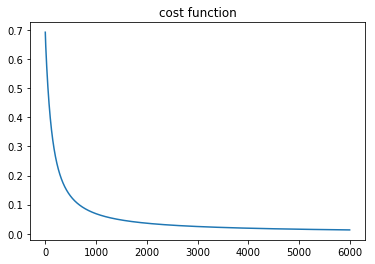

In [211]:
cost_func = np.array(cost_outputs)
cost_func = cost_func.reshape(6000,1)
plt.plot(range(len(cost_func)),cost_func)
plt.title("cost function")
plt.show()

In [215]:
# in OOP, this could be a method called predict, that returns an array of predited values,
# similar to what sklearn does

from sklearn.metrics import accuracy_score

test_x_1 = X_test[:,0]
test_x_2 = X_test[:,1]
test_x_3 = X_test[:,2]
test_x_4 = X_test[:,3]

test_x_1 = np.array(test_x_1)
test_x_2 = np.array(test_x_2)
test_x_3 = np.array(test_x_3)
test_x_4 = np.array(test_x_4)

test_x_1 = test_x_1.reshape(10,1)
test_x_2 = test_x_2.reshape(10,1)
test_x_3 = test_x_3.reshape(10,1)
test_x_4 = test_x_4.reshape(10,1)

index = list(range(10,90))    

theta0 = theta0[:10]
theta1 = theta1[:10]
theta2 = theta2[:10]
theta3 = theta3[:10]
theta4 = theta4[:10]

theta0 = theta0.reshape(10,1)
theta1 = theta1.reshape(10,1)
theta2 = theta2.reshape(10,1)
theta3 = theta3.reshape(10,1)
theta4 = theta4.reshape(10,1)

linear_eq = theta0 + theta1 * test_x_1 + theta2 * test_x_2 + theta3 * test_x_3 + theta4 * test_x_4
predictions = sigmoid(linear_eq)

array_predictions =[]

for prediction in predictions:
    if(prediction >= 0.5):
        array_predictions.append(1)
    else:
        array_predictions.append(0)

print(accuracy_score(y_test, array_predictions))

1.0
